# SSVEP Summarization about ML Requirement

In [23]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from IPython import get_ipython
import seaborn as sns
import glob
import pandas as pd
from scipy import signal

In [24]:
# extracted from : https://stackoverflow.com/questions/39032325/python-high-pass-filter
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

In [29]:
def fourier(node):
    y = df[node]
    y = butter_highpass_filter(y,5,132,5)   
    ps = np.abs(np.fft.fft(y))**2

    time_step = float(1)/128
    freqs = np.fft.fftfreq( y.size , time_step )
    idx = np.argsort(freqs)
    
    return freqs,ps,idx

In [48]:
file_ = ('../Data/ssvep/dinuka_8' + ".csv")

df = pd.read_csv(file_,index_col=None, header=0,skiprows=range(1, 35))

rows,clmns = df.shape 

df = df.loc[128 :5*128]

15.9688109162 322969.845132


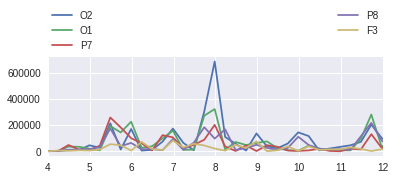

In [51]:
# display of all the nodes with values

f1,p1,i1 = fourier('O1 Value')
f2,p2,i2 = fourier('O2 Value')
f3,p3,i3 = fourier('P7 Value')
f4,p4,i4 = fourier('P8 Value')
f5,p5,i5 = fourier('F3 Value')

print f1[64], p1[32]

plt.figure(1)
plt.subplot(211)
plt.plot(f2[i2] , p2[i2],label="O2")
plt.plot(f1[i1] , p1[i1],label="O1")
plt.plot(f3[i3] , p3[i3],label="P7")
plt.plot(f4[i4] , p4[i4],label="P8")
plt.plot(f5[i5] , p5[i5],label="F3")

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)


plt.xlim([4,12])
plt.show()

This is clear result for the 5 seconds length data collection analysis. As you can see 20 mins of data collection doesn't want any machine learning methods to identify the SSVEP freuquency

apart from these O2 provides the significant amount of details about the Frequency.

here after we may use O2 as the significant feature

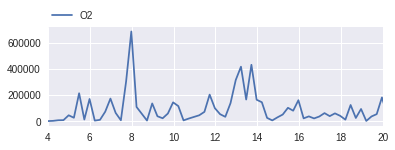

In [52]:
# specifying the O2 node for the value
f2,p2,i2 = fourier('O2 Value')

plt.figure(1)
plt.subplot(211)

plt.plot(f2[i2] , p2[i2],label="O2")

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.xlim([4,20])
plt.show()

### 1, 3, 5, 10 seconds feature extraction comparison

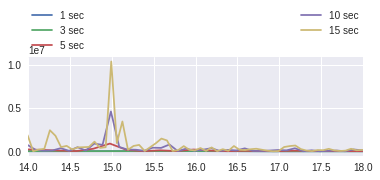

In [53]:
file_ = ('../Data/ssvep/dinuka_15' + ".csv")

df = pd.read_csv(file_,index_col=None, header=0,skiprows=range(1, 35))

rows,clmns = df.shape

df1 = df.loc[128 :2*128]
df3 = df.loc[128 :3*128]
df5 = df.loc[128 :6*128]
df10 = df.loc[128 :11*128]
df15 = df.loc[128 :16*128]

def fourier(df,node):
    y = df[node]
    y = butter_highpass_filter(y,5,132,5)   
    ps = np.abs(np.fft.fft(y))**2

    time_step = float(1)/128
    freqs = np.fft.fftfreq( y.size , time_step )
    idx = np.argsort(freqs)
    
    return freqs,ps,idx

f1,p1,i1 = fourier(df1,'O2 Value')
f2,p2,i2 = fourier(df3,'O2 Value')
f3,p3,i3 = fourier(df5,'O2 Value')
f4,p4,i4 = fourier(df10,'O2 Value')
f5,p5,i5 = fourier(df15,'O2 Value')

plt.figure(1)
plt.subplot(211)
plt.plot(f1[i1] , p1[i1],label="1 sec")
plt.plot(f2[i2] , p2[i2],label="3 sec")
plt.plot(f3[i3] , p3[i3],label="5 sec")
plt.plot(f4[i4] , p4[i4],label="10 sec")
plt.plot(f5[i5] , p5[i5],label="15 sec")

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.xlim([14,18])
plt.show()

This clearly shows that with the increase of the time significance of the spike is also increased. Lets try to
find the minimum time required to find and compare values.

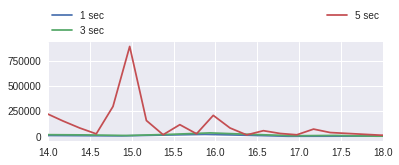

In [54]:
plt.figure(1)
plt.subplot(211)
plt.plot(f1[i1] , p1[i1],label="1 sec")
plt.plot(f2[i2] , p2[i2],label="3 sec")
plt.plot(f3[i3] , p3[i3],label="5 sec")

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.xlim([14,18])
plt.show()

here you can see the 5 sec is minimum bound of the 

### Using External data set

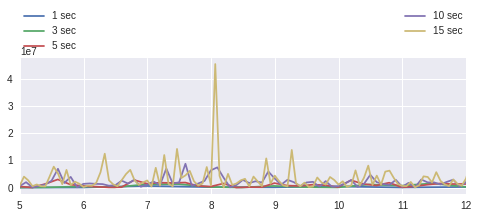

In [13]:
file_ = ('../Data/ssvep/SSVEP_8Hz_Trial1' + ".csv")

df = pd.read_csv(file_,index_col=None, header=0,skiprows=range(1, 35))

rows,clmns = df.shape

df1 = df.loc[256 :2*256]
df3 = df.loc[256 :3*256]
df5 = df.loc[256 :6*256]
df10 = df.loc[256 :11*256]
df15 = df.loc[256 :16*256]

def fourier(df,node):
    y = df[node]
    y = butter_highpass_filter(y,5,256,5)   
    ps = np.abs(np.fft.fft(y))**2

    time_step = float(1)/256
    freqs = np.fft.fftfreq( y.size , time_step )
    idx = np.argsort(freqs)
    
    return freqs,ps,idx

f1,p1,i1 = fourier(df1,'A23')
f2,p2,i2 = fourier(df3,'A23')
f3,p3,i3 = fourier(df5,'A23')
f4,p4,i4 = fourier(df10,'A23')
f5,p5,i5 = fourier(df15,'A23')

plt.figure(1)
plt.subplot(211)
plt.plot(f1[i1] , p1[i1],label="1 sec")
plt.plot(f2[i2] , p2[i2],label="3 sec")
plt.plot(f3[i3] , p3[i3],label="5 sec")
plt.plot(f4[i4] , p4[i4],label="10 sec")
plt.plot(f5[i5] , p5[i5],label="15 sec")

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.xlim([5,12])
plt.show()

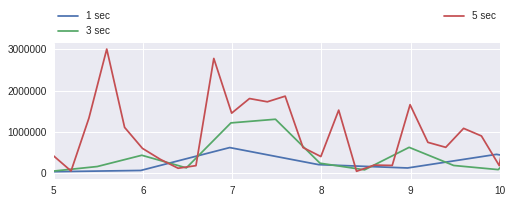

In [14]:
plt.figure(1)
plt.subplot(211)
plt.plot(f1[i1] , p1[i1],label="1 sec")
plt.plot(f2[i2] , p2[i2],label="3 sec")
plt.plot(f3[i3] , p3[i3],label="5 sec")

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.xlim([5,10])
plt.show()

Even from external data it is shown that after 5 sec we need ML methods to classify the data. 